# Exploring Dandiset 001335: Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation

> **Note: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

This notebook explores a dataset of neural recordings from the hippocampus of head-fixed mice during odor presentation. The data was collected using Neuropixels probes, which allow for high-density recordings of neural activity. The experiment involves presenting different odors to mice and recording the neural responses.

You can explore this dataset in more detail at: https://neurosift.app/dandiset/001335

## Overview of This Notebook

In this notebook, we will:
1. Load the dataset and examine its basic structure
2. Examine the experimental design and the timing of odor presentations
3. Visualize and analyze the LFP (Local Field Potential) data
4. Explore individual neuron (unit) activity in response to odors
5. Compare neural responses across different odors

## Required Packages

In [1]:
# Core packages for data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# Packages for NWB file handling
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

# Signal processing
from scipy import signal as scipy_signal

# Configure plotting
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

## Loading the Dandiset

We'll use the DANDI API to access the dataset. This dataset contains Neuropixels recordings from mice hippocampus during odor presentation.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nAsset details:")
for asset in assets:
    print(f"- Path: {asset.path}")
    print(f"- Asset ID: {asset.identifier}")
    print(f"- Size: {asset.size/1e6:.2f} MB")

Found 1 assets in the dataset

Asset details:
- Path: sub-M541/sub-M541_ecephys.nwb
- Asset ID: aca66db7-4c02-4453-8dcb-a179d44b1c5d
- Size: 1374.26 MB


Let's load the NWB file. This dataset contains a single NWB file with neural recordings from mouse M541.

In [3]:
# Select the asset to work with
asset = assets[0]  # There's only one asset in this dataset

# Get the URL for direct download
asset_url = f"https://api.dandiarchive.org/api/assets/{asset.identifier}/download/"
print(f"Asset URL: {asset_url}")

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Asset URL: https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/


## Exploring the Dataset Structure

Let's explore the basic structure of the dataset to understand what it contains.

In [4]:
# Basic metadata
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Keywords: {nwb.keywords[:]}")

# Subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Identifier: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00
Lab: vandermeerlab
Institution: Dartmouth College
Keywords: ['ecephys' 'neuropixels' 'odor-sequences' 'hippocampus']

Subject Information:
Subject ID: M541
Species: Mus musculus
Sex: M
Age: P8W/
Description: Headbarr-ed mouse with craniotomies over dCA1


## Experimental Design: Blocks and Odor Presentations

The experiment is organized into "blocks" with different odor presentations. Let's examine the blocks and odor presentations to understand the experimental design.

In [5]:
# Get block intervals
print("Block Information:")
for block_name in ["Block 1", "Block 2", "Block 3"]:
    block = nwb.intervals[block_name]
    df = block.to_dataframe()
    start_time = df['start_time'].values[0]
    stop_time = df['stop_time'].values[0]
    duration = stop_time - start_time
    print(f"{block_name}: Start={start_time:.2f}s, Stop={stop_time:.2f}s, Duration={duration:.2f}s")
    print(f"Description: {block.description}")

Block Information:
Block 1: Start=616.00s, Stop=2144.00s, Duration=1528.00s
Description: Interval when Block 1 odors were being presented
Block 2: Start=2712.00s, Stop=4243.00s, Duration=1531.00s
Description: Interval when Block 2 odors were being presented
Block 3: Start=4859.00s, Stop=6182.00s, Duration=1323.00s
Description: Interval when Block 3 odors were being presented


Now let's look at the odor presentation intervals to understand when different odors were presented.

In [6]:
# Get odor presentation intervals
print("Odor Presentation Information:")
odor_intervals = {}
for odor in ["A", "B", "C", "D", "E", "F"]:
    interval_name = f"Odor {odor} ON"
    if interval_name in nwb.intervals:
        interval = nwb.intervals[interval_name]
        df = interval.to_dataframe()
        odor_intervals[odor] = df
        first_start = df['start_time'].iloc[0]
        last_stop = df['stop_time'].iloc[-1]
        avg_duration = (df['stop_time'] - df['start_time']).mean()
        n_presentations = len(df)
        print(f"Odor {odor}: {n_presentations} presentations, first at {first_start:.2f}s, last ending at {last_stop:.2f}s")
        print(f"Average presentation duration: {avg_duration:.2f}s")

Odor Presentation Information:
Odor A: 101 presentations, first at 645.08s, last ending at 6168.19s
Average presentation duration: 2.00s
Odor B: 101 presentations, first at 627.42s, last ending at 6114.42s
Average presentation duration: 2.00s
Odor C: 101 presentations, first at 621.84s, last ending at 6147.06s
Average presentation duration: 2.00s
Odor D: 101 presentations, first at 2717.42s, last ending at 6102.93s
Average presentation duration: 2.00s
Odor E: 101 presentations, first at 2724.06s, last ending at 6158.08s
Average presentation duration: 2.00s
Odor F: 101 presentations, first at 2729.77s, last ending at 6003.61s
Average presentation duration: 2.00s


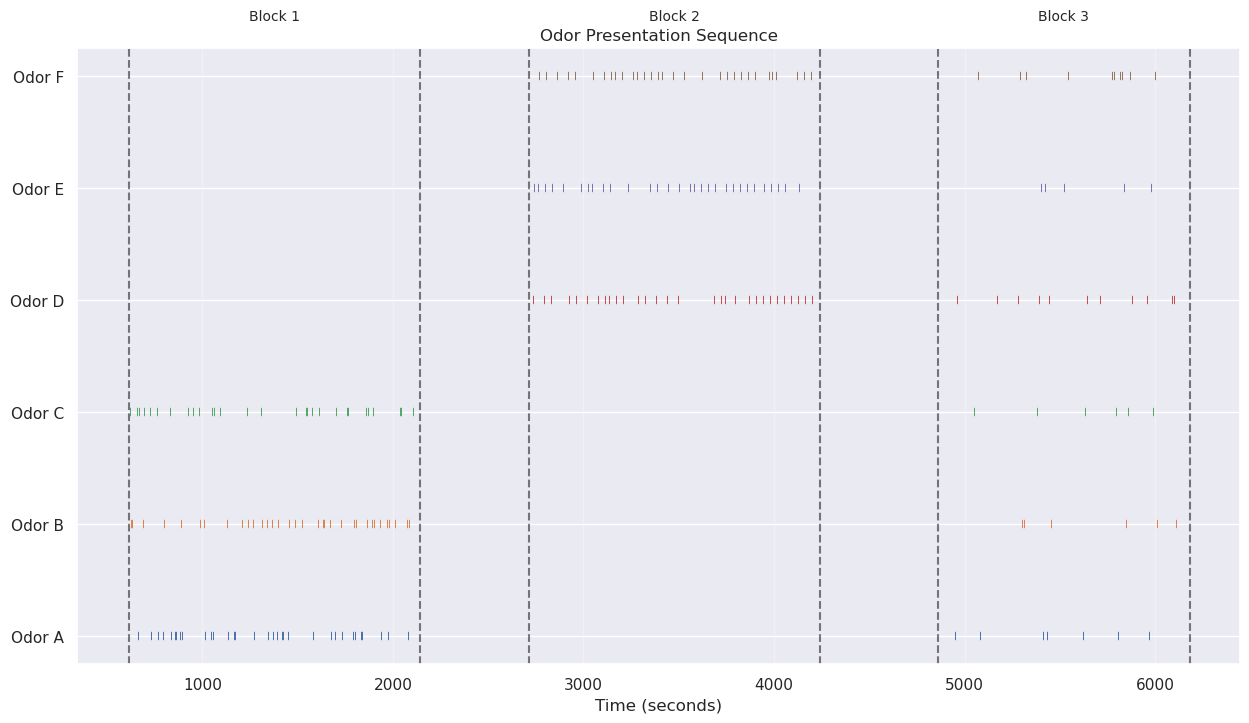

In [7]:
# Create a plot showing the temporal sequence of odor presentations
plt.figure(figsize=(15, 8))
plot_height = 0.8  # Height of each odor's bar

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
all_odors = sorted(odor_intervals.keys())

for i, odor in enumerate(all_odors):
    df = odor_intervals[odor]
    for j, row in df.iterrows():
        plt.plot([row['start_time'], row['stop_time']], 
                 [i + 1, i + 1], 
                 linewidth=6, 
                 solid_capstyle='butt',
                 color=colors[i % len(colors)])

# Add block boundaries as vertical lines
block_df = {block: nwb.intervals[block].to_dataframe() for block in ["Block 1", "Block 2", "Block 3"]}
for block, df in block_df.items():
    for _, row in df.iterrows():
        plt.axvline(row['start_time'], color='black', linestyle='--', alpha=0.5)
        plt.axvline(row['stop_time'], color='black', linestyle='--', alpha=0.5)
        # Add text label
        plt.text(row['start_time'] + (row['stop_time'] - row['start_time'])/2, 
                 len(all_odors) + 0.5, 
                 block, 
                 ha='center', 
                 fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.7))

plt.yticks(range(1, len(all_odors) + 1), [f'Odor {odor}' for odor in all_odors])
plt.xlabel('Time (seconds)')
plt.title('Odor Presentation Sequence')
plt.grid(True, alpha=0.3, axis='x')

Let's zoom in on a small time window to see the detailed pattern of odor presentations.

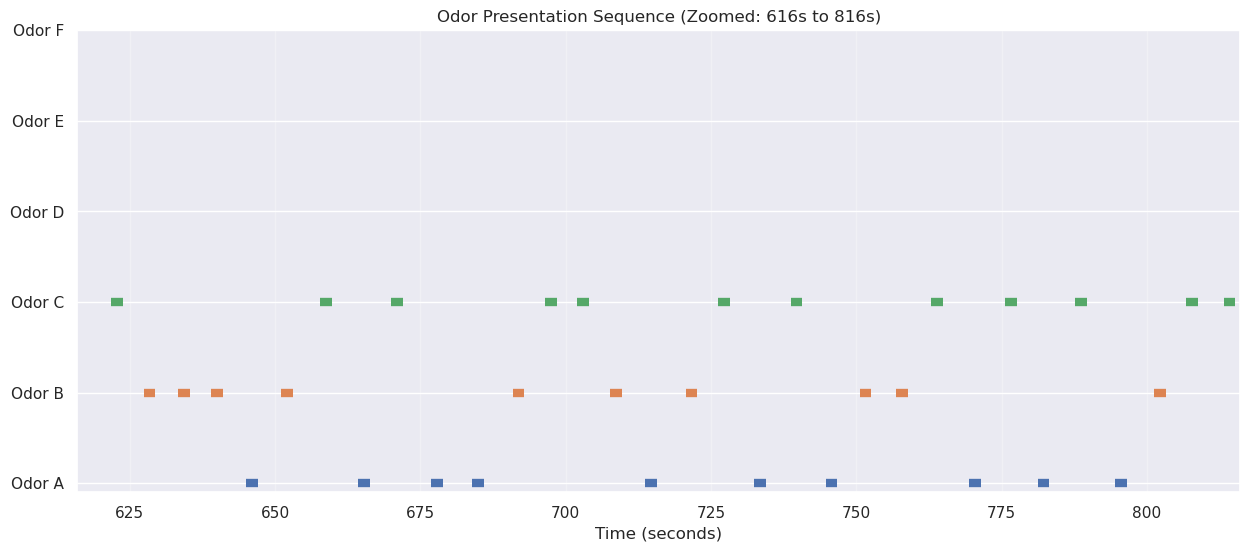

In [8]:
# Take a 200 second window from the beginning of Block 1
zoom_start = block_df["Block 1"]['start_time'].values[0]
zoom_end = zoom_start + 200  # 200 second window

plt.figure(figsize=(15, 6))
for i, odor in enumerate(all_odors):
    df = odor_intervals[odor]
    filtered_df = df[(df['start_time'] >= zoom_start) & (df['stop_time'] <= zoom_end)]
    for j, row in filtered_df.iterrows():
        plt.plot([row['start_time'], row['stop_time']], 
                 [i + 1, i + 1], 
                 linewidth=6, 
                 solid_capstyle='butt',
                 color=colors[i % len(colors)])

plt.yticks(range(1, len(all_odors) + 1), [f'Odor {odor}' for odor in all_odors])
plt.xlabel('Time (seconds)')
plt.title(f'Odor Presentation Sequence (Zoomed: {zoom_start:.0f}s to {zoom_end:.0f}s)')
plt.xlim(zoom_start, zoom_end)
plt.grid(True, alpha=0.3, axis='x')

From the plots, we can see that the experiment is organized into three blocks:

1. **Block 1**: Presents odors A, B, and C
2. **Block 2**: Presents odors D, E, and F
3. **Block 3**: Presents all odors (A through F)

Each odor presentation lasts approximately 2 seconds, and presentations are spaced about 10-15 seconds apart.

## Exploring Electrode Configuration and LFP Data

The recording was made using Neuropixels probes, with multiple electrode shanks inserted into the hippocampus. Let's examine the electrode configuration and look at the LFP data.

In [9]:
# Get electrode information
electrode_df = nwb.electrodes.to_dataframe()
print(f"Total number of electrodes: {len(electrode_df)}")

print("\nElectrode groups:")
for group_name, count in electrode_df['group_name'].value_counts().items():
    print(f"- {group_name}: {count} electrodes")

print("\nSample electrode information:")
print(electrode_df.head())

Total number of electrodes: 64

Electrode groups:
- imec0.shank0: 8 electrodes
- imec0.shank1: 8 electrodes
- imec0.shank2: 8 electrodes
- imec0.shank3: 8 electrodes
- imec1.shank0: 8 electrodes
- imec1.shank1: 8 electrodes
- imec1.shank2: 8 electrodes
- imec1.shank3: 8 electrodes

Sample electrode information:
      location                                              group  \
id                                                                  
0   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
1   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
2   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
3   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
4   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   

      group_name           label   depth hemisphere  
id                                                   
0   imec0.shank0  imec0.ap#AP112  2390.0      Right  
1   imec0.shank0  imec0.ap#AP126  2285.0 

Let's visualize the depth distribution of electrodes across different shanks.

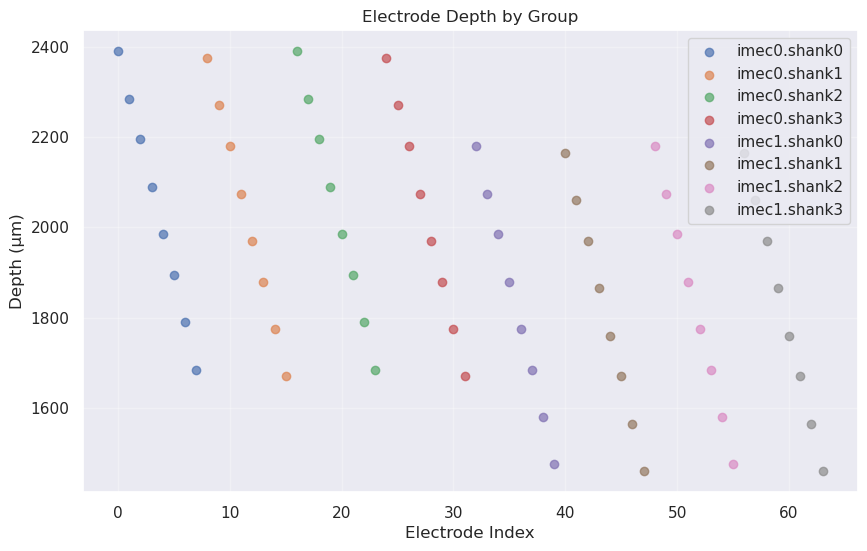

In [10]:
plt.figure(figsize=(10, 6))
if 'depth' in electrode_df.columns:
    for group_name in electrode_df['group_name'].unique():
        group_data = electrode_df[electrode_df['group_name'] == group_name]
        plt.scatter(group_data.index, group_data['depth'], 
                   label=group_name, alpha=0.7)
    plt.xlabel('Electrode Index')
    plt.ylabel('Depth (µm)')
    plt.title('Electrode Depth by Group')
    plt.legend()
    plt.grid(True, alpha=0.3)

Now let's look at the LFP (Local Field Potential) data. LFP represents the summed electrical activity from neural populations around each electrode.

In [11]:
# Get LFP data
lfp = nwb.processing['ecephys'].data_interfaces['LFP']
print("LFP Information:")
print(f"- Number of channels: {lfp.data.shape[1]}")
print(f"- Number of timepoints: {lfp.data.shape[0]}")
print(f"- Sampling rate: {lfp.rate} Hz")
print(f"- Duration: {lfp.data.shape[0]/lfp.rate:.2f} seconds")
print(f"- Description: {lfp.description}")

LFP Information:
- Number of channels: 64
- Number of timepoints: 15475276
- Sampling rate: 2500.0 Hz
- Duration: 6190.11 seconds
- Description: Raw data subsampled  2500 Hz and bandpass filtered in the range 1-400 Hz


Let's extract a small segment of LFP data from the start of Block 1 and visualize it.

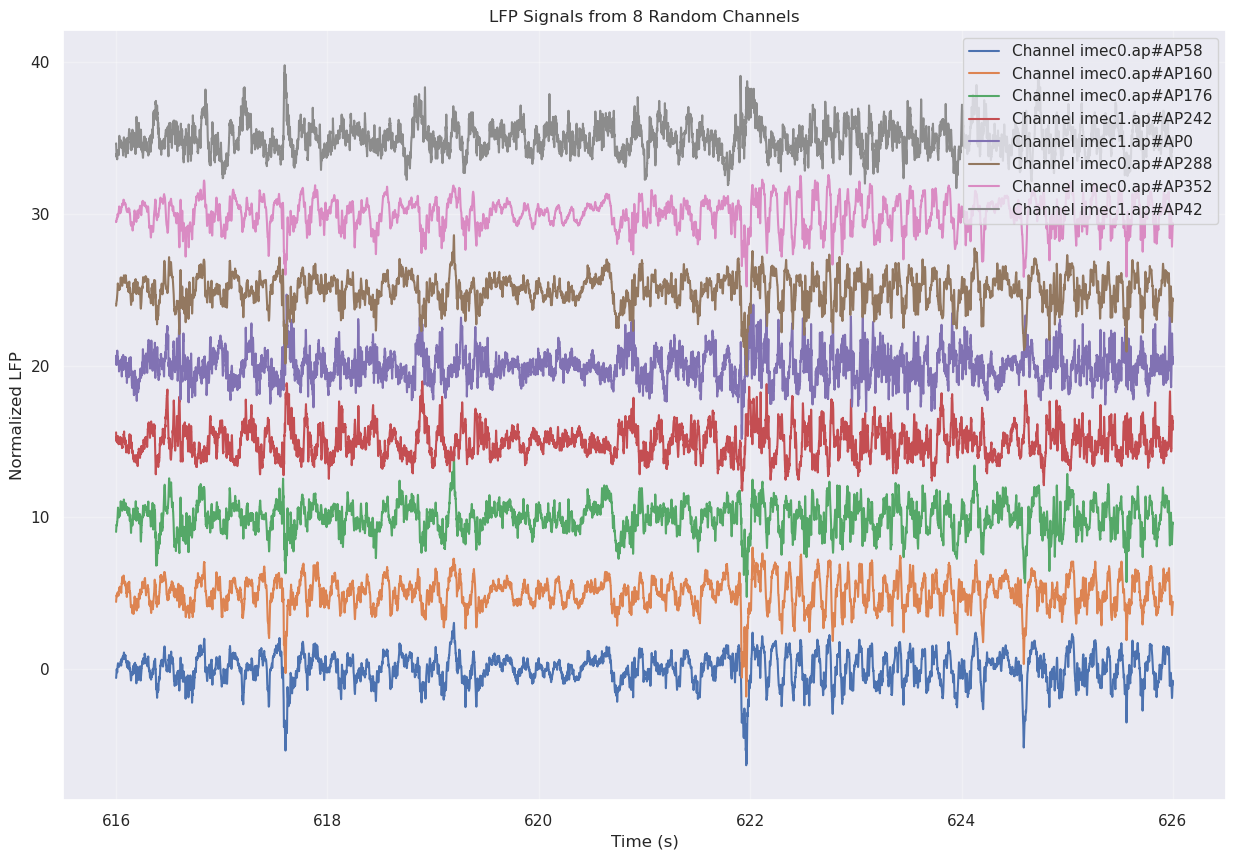

In [12]:
# Extract a small chunk of LFP data (10 seconds from the beginning of Block 1)
# First determine the index for Block 1 start time
block1_start = block_df["Block 1"]['start_time'].values[0]
start_idx = int(block1_start * lfp.rate)  # Convert time to samples
chunk_size = int(10 * lfp.rate)  # 10 seconds of data
lfp_chunk = lfp.data[start_idx:start_idx+chunk_size, :]

# Create time array for the extracted chunk
time_chunk = np.arange(chunk_size) / lfp.rate + block1_start

# Plot LFP data from 8 random channels
plt.figure(figsize=(15, 10))
random_channels = np.random.choice(lfp_chunk.shape[1], 8, replace=False)
for i, channel in enumerate(random_channels):
    # Normalize and offset each channel for visibility
    signal = lfp_chunk[:, channel]
    normalized_signal = (signal - signal.mean()) / signal.std()
    plt.plot(time_chunk, normalized_signal + i*5, 
             label=f"Channel {electrode_df.iloc[channel]['label']}")

plt.xlabel('Time (s)')
plt.ylabel('Normalized LFP')
plt.title('LFP Signals from 8 Random Channels')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

The LFP signals show clear oscillatory patterns. Let's perform spectral analysis to identify the frequency components of these oscillations.

Text(0.5, 1.0, 'Spectrogram of LFP Channel imec0.ap#AP58')

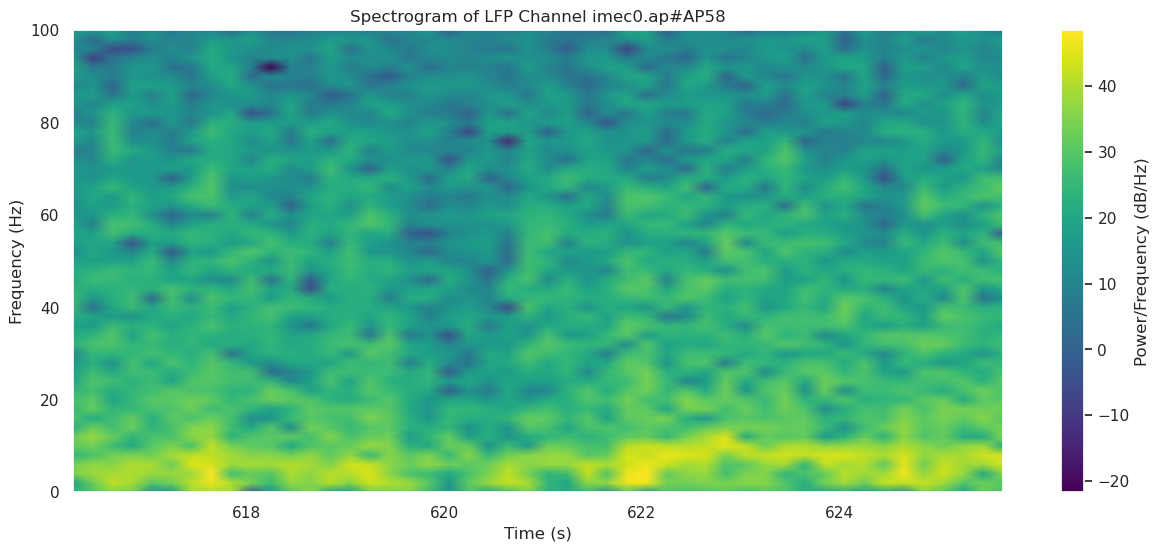

In [13]:
# Select one channel for the spectrogram
selected_channel = random_channels[0]
lfp_signal = lfp_chunk[:, selected_channel]

# Calculate spectrogram
f, t, Sxx = scipy_signal.spectrogram(lfp_signal, 
                          fs=lfp.rate, 
                          window='hann', 
                          nperseg=int(lfp.rate * 0.5),  # 0.5 second window
                          noverlap=int(lfp.rate * 0.3),  # 60% overlap
                          scaling='spectrum')

# Only show frequencies up to 100 Hz
f_mask = f <= 100
f_masked = f[f_mask]
Sxx_masked = Sxx[f_mask, :]

plt.figure(figsize=(15, 6))
plt.pcolormesh(t + block1_start, f_masked, 10 * np.log10(Sxx_masked), 
              shading='gouraud', cmap='viridis')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'Spectrogram of LFP Channel {electrode_df.iloc[selected_channel]["label"]}')

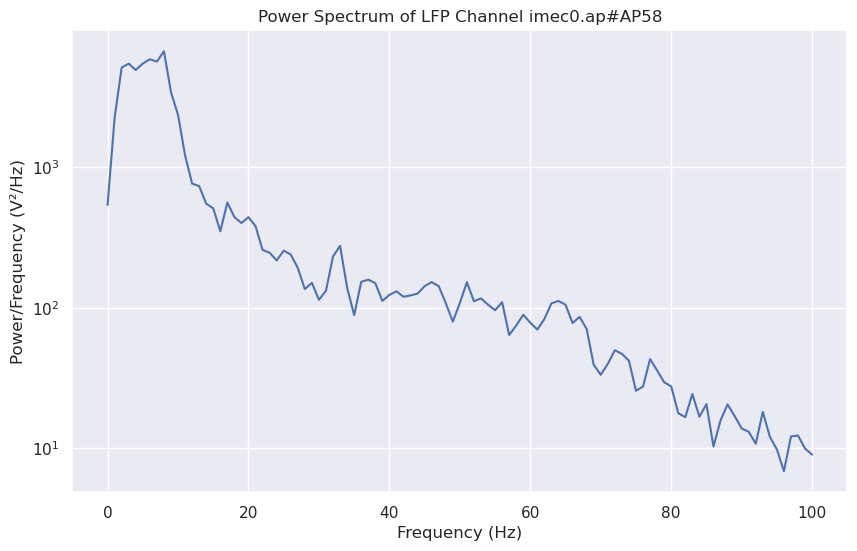

In [14]:
# Calculate average power spectrum
f, Pxx = scipy_signal.welch(lfp_signal, fs=lfp.rate, 
                     window='hann', 
                     nperseg=int(lfp.rate * 1.0),  # 1 second window
                     scaling='spectrum')
# Plot only up to 100 Hz
f_mask = f <= 100
plt.figure(figsize=(10, 6))
plt.semilogy(f[f_mask], Pxx[f_mask])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (V²/Hz)')
plt.title(f'Power Spectrum of LFP Channel {electrode_df.iloc[selected_channel]["label"]}')
plt.grid(True)

The spectrogram and power spectrum show strong theta oscillations (4-8 Hz), which are characteristic of hippocampal activity. There is also activity in the gamma band (30-100 Hz), which is often associated with cognitive processing in the hippocampus.

## Neural Responses to Odor Stimuli

Now let's examine the activity of individual neurons (units) in response to odor presentations. The dataset contains spiking data from 283 units recorded from the hippocampus.

In [15]:
# Get basic unit information
units_df = nwb.units.to_dataframe()
print(f"Total number of units (neurons): {len(units_df)}")

print("\nElectrode group distribution:")
for group, count in units_df['electrode_group'].value_counts().items():
    if hasattr(group, 'name'):
        print(f"- {group.name}: {count} units")

if 'depth' in units_df.columns:
    print("\nDepth distribution:")
    depth_bins = np.linspace(units_df['depth'].min(), units_df['depth'].max(), 10)
    depth_counts, _ = np.histogram(units_df['depth'].dropna(), bins=depth_bins)
    for i, count in enumerate(depth_counts):
        print(f"- {depth_bins[i]:.0f}-{depth_bins[i+1]:.0f} µm: {count} units")

Total number of units (neurons): 283

Electrode group distribution:
- imec1.shank3: 54 units
- imec0.shank0: 53 units
- imec1.shank2: 46 units
- imec1.shank1: 41 units
- imec0.shank1: 29 units
- imec1.shank0: 26 units
- imec0.shank3: 20 units
- imec0.shank2: 14 units

Depth distribution:
- 1460-1557 µm: 17 units
- 1557-1653 µm: 66 units
- 1653-1750 µm: 21 units
- 1750-1847 µm: 36 units
- 1847-1943 µm: 23 units
- 1943-2040 µm: 56 units
- 2040-2137 µm: 37 units
- 2137-2233 µm: 17 units
- 2233-2330 µm: 10 units


Let's look at the spike times of a few randomly selected units to understand their firing patterns.

In [16]:
# Select a subset of units to analyze
num_units_to_analyze = 5
units_to_analyze = np.random.choice(len(units_df), num_units_to_analyze, replace=False)
units_to_analyze.sort()  # Sort to keep indices in ascending order

print(f"Analyzing spike times for {num_units_to_analyze} randomly selected units:")
unit_spike_times = []
for unit_idx in units_to_analyze:
    # Get spike times for this unit
    spike_times = nwb.units['spike_times'][unit_idx]
    unit_spike_times.append(spike_times)
    # Print basic spike statistics
    print(f"Unit {unit_idx} (ID: {units_df.iloc[unit_idx]['global_id']}):")
    print(f"- Number of spikes: {len(spike_times)}")
    if len(spike_times) > 0:
        print(f"- Time range: {spike_times[0]:.2f}s to {spike_times[-1]:.2f}s")
        print(f"- Mean firing rate: {len(spike_times) / (spike_times[-1] - spike_times[0]):.2f} Hz")
    print()

Analyzing spike times for 5 randomly selected units:
Unit 46 (ID: imec0.shank0.188):
- Number of spikes: 1072
- Time range: 0.77s to 6186.04s
- Mean firing rate: 0.17 Hz

Unit 106 (ID: imec0.shank0.385):
- Number of spikes: 1876
- Time range: 1.75s to 6178.22s
- Mean firing rate: 0.30 Hz

Unit 134 (ID: imec1.shank3.68 ):
- Number of spikes: 17132
- Time range: 0.50s to 6190.08s
- Mean firing rate: 2.77 Hz

Unit 187 (ID: imec1.shank1.263):
- Number of spikes: 4422
- Time range: 2772.50s to 6189.93s
- Mean firing rate: 1.29 Hz

Unit 199 (ID: imec1.shank2.320):
- Number of spikes: 710
- Time range: 2.31s to 6128.16s
- Mean firing rate: 0.12 Hz



Now let's visualize how these neurons respond to odor presentations. First, let's create a function to plot spike rasters aligned to odor onset.

In [17]:
def plot_odor_triggered_raster(odor, time_window=(-1, 3)):
    """Plot spike rasters triggered by presentations of a specific odor"""
    if odor not in odor_intervals:
        print(f"No intervals found for Odor {odor}")
        return
    
    odor_df = odor_intervals[odor]
    
    # Select a subset of odor presentations to keep the plot readable
    max_presentations = 20
    if len(odor_df) > max_presentations:
        # Sample presentations from different parts of the experiment
        indices = np.linspace(0, len(odor_df)-1, max_presentations, dtype=int)
        odor_df_subset = odor_df.iloc[indices]
    else:
        odor_df_subset = odor_df
    
    plt.figure(figsize=(12, 8))
    
    for unit_num, (unit_idx, spike_times) in enumerate(zip(units_to_analyze, unit_spike_times)):
        for trial_num, (_, presentation) in enumerate(odor_df_subset.iterrows()):
            # Get odor onset time
            odor_onset = presentation['start_time']
            
            # Find spikes within the time window around odor onset
            window_start = odor_onset + time_window[0]
            window_end = odor_onset + time_window[1]
            
            # Filter spikes within this window
            trial_spikes = spike_times[(spike_times >= window_start) & (spike_times <= window_end)]
            
            # Plot raster for this trial
            if len(trial_spikes) > 0:
                trial_y = trial_num + unit_num * (len(odor_df_subset) + 1)  # Offset for each unit
                plt.scatter(trial_spikes - odor_onset, np.ones_like(trial_spikes) * trial_y, 
                           marker='|', s=20, color=f'C{unit_num%10}')
    
    # Add odor onset line
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Odor Onset')
    
    # Add odor offset line (assuming 2s duration based on average)
    plt.axvline(x=2, color='blue', linestyle='--', alpha=0.5, label='Odor Offset (approx)')
    
    plt.xlabel('Time relative to odor onset (s)')
    plt.ylabel('Trial × Unit')
    plt.title(f'Spike Raster Plot for Odor {odor} Presentations')
    plt.grid(alpha=0.3)
    plt.legend()

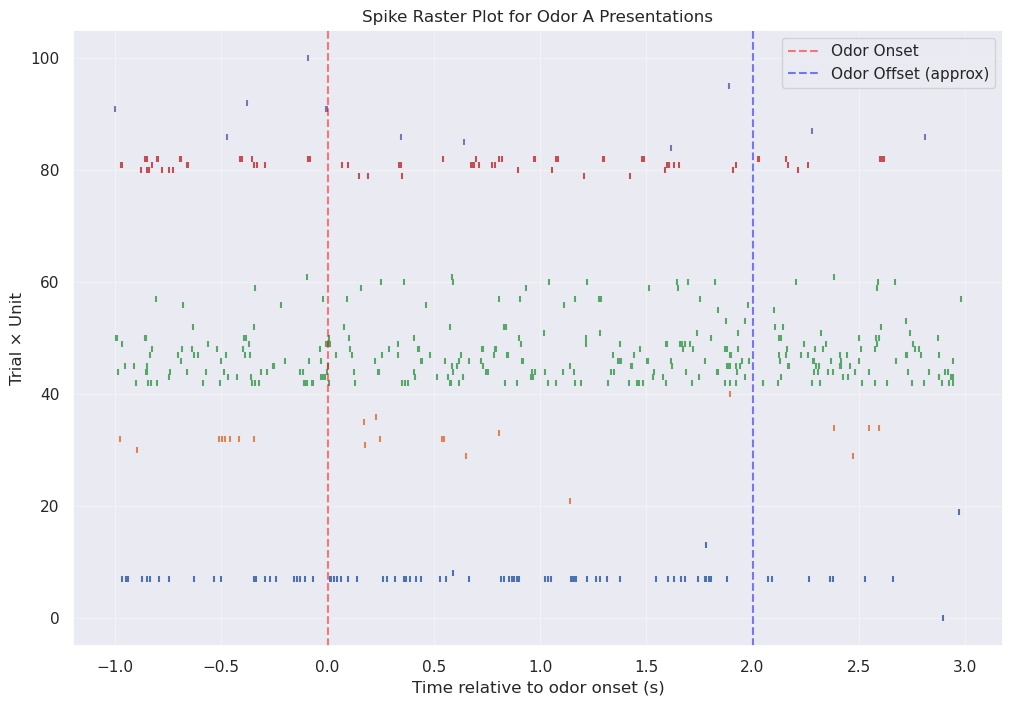

In [18]:
# Plot spike rasters for odor A
plot_odor_triggered_raster("A")

Now let's create a function to visualize firing rates in response to different odors, which will help us see if neurons are selective for specific odors.

In [19]:
def plot_odor_firing_rate_comparison():
    """Plot average firing rates for different odors"""
    # Define the time window around odor onset
    time_window = (-1, 3)  # 1 second before to 3 seconds after odor onset
    bin_size = 0.1  # 100 ms bins
    
    # Create time bins
    bins = np.arange(time_window[0], time_window[1] + bin_size, bin_size)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    plt.figure(figsize=(12, 10))
    
    for unit_num, (unit_idx, spike_times) in enumerate(zip(units_to_analyze, unit_spike_times)):
        plt.subplot(len(units_to_analyze), 1, unit_num + 1)
        
        for odor in ["A", "B", "C", "D", "E", "F"]:
            if odor not in odor_intervals:
                continue
                
            odor_df = odor_intervals[odor]
            all_psth = []
            
            # Calculate PSTH for each odor presentation
            for _, presentation in odor_df.iterrows():
                odor_onset = presentation['start_time']
                window_start = odor_onset + time_window[0]
                window_end = odor_onset + time_window[1]
                
                # Filter spikes within this window
                trial_spikes = spike_times[(spike_times >= window_start) & (spike_times <= window_end)]
                
                # Convert to relative time
                relative_spikes = trial_spikes - odor_onset
                
                # Create histogram of spike counts
                hist, _ = np.histogram(relative_spikes, bins=bins)
                
                # Convert to firing rate (Hz)
                firing_rate = hist / bin_size
                all_psth.append(firing_rate)
            
            # Average across trials
            if all_psth:
                avg_psth = np.mean(all_psth, axis=0)
                sem_psth = np.std(all_psth, axis=0) / np.sqrt(len(all_psth))
                
                # Plot average firing rate with error bands
                plt.plot(bin_centers, avg_psth, label=f'Odor {odor}')
                plt.fill_between(bin_centers, avg_psth - sem_psth, avg_psth + sem_psth, alpha=0.2)
        
        # Add odor presentation time
        plt.axvspan(0, 2, color='gray', alpha=0.2, label='Odor ON')
        
        plt.title(f'Unit {unit_idx} (ID: {units_df.iloc[unit_idx]["global_id"]})')
        if unit_num == 0:
            plt.legend(loc='upper right')
        if unit_num == len(units_to_analyze) - 1:  # Only add x-label on bottom subplot
            plt.xlabel('Time relative to odor onset (s)')
        plt.ylabel('Firing Rate (Hz)')
        plt.grid(alpha=0.3)
    
    plt.tight_layout()

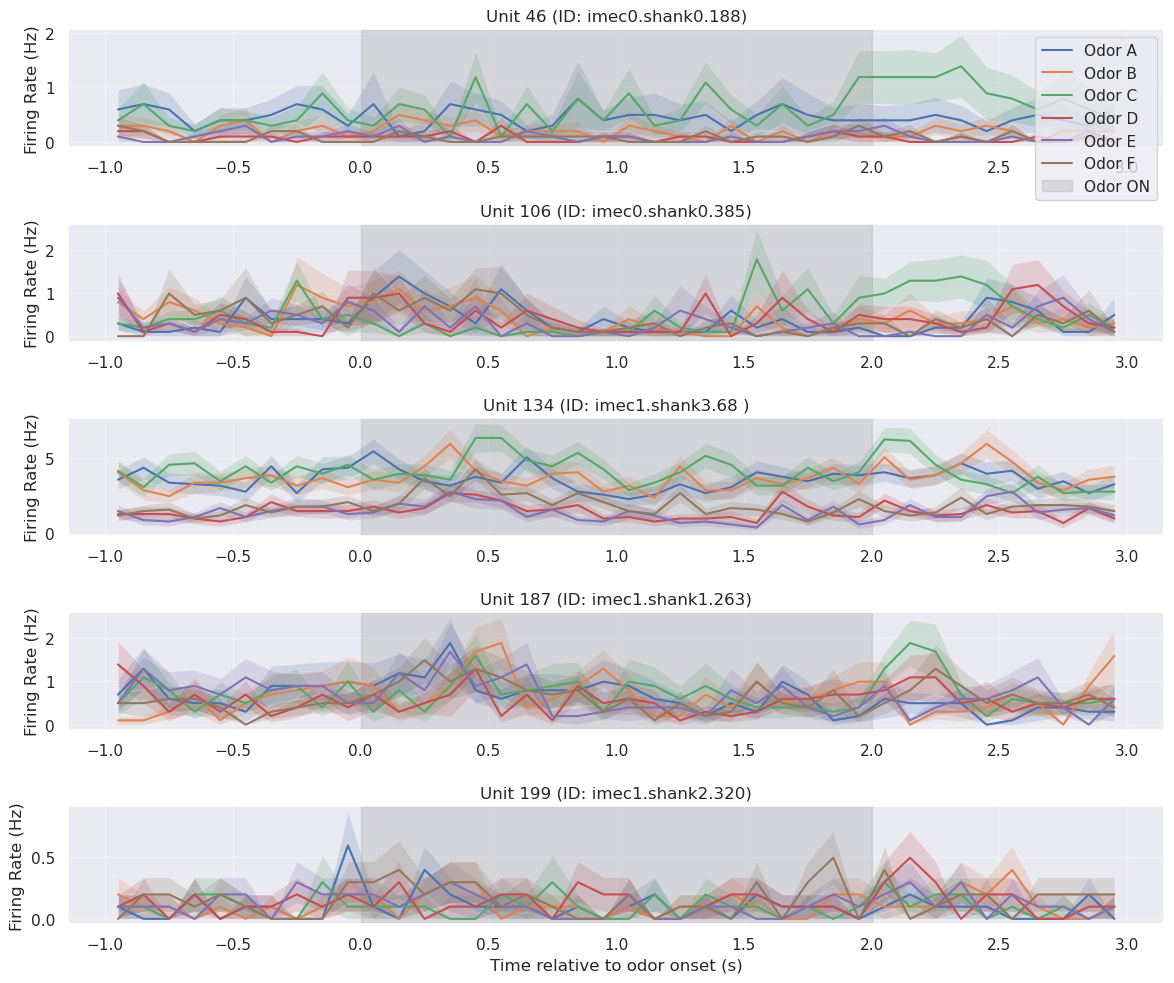

In [20]:
# Plot firing rate comparison
plot_odor_firing_rate_comparison()

## Summary and Conclusions

In this notebook, we explored a dataset of Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation. Here are the main findings:

**Experimental Design**:
- The experiment was organized into three blocks: Block 1 (odors A, B, C), Block 2 (odors D, E, F), and Block 3 (all odors).
- Each odor presentation lasted approximately 2 seconds.
- Odors were presented in a pseudorandom sequence within each block.

**Neural Recordings**:
- Recordings were made using Neuropixels probes with multiple shanks inserted into the hippocampus.
- The dataset includes both LFP signals (continuous data that represents population activity) and spike data (representing individual neuron action potentials).

**LFP Oscillations**:
- The LFP data shows strong theta oscillations (4-8 Hz), which are characteristic of hippocampal activity during sensory processing and cognitive tasks.
- There is also activity in the gamma band (30-100 Hz), which is associated with neural computations and information processing.

**Neural Responses to Odors**:
- Individual neurons show diverse response patterns to odor presentations, including increased firing, decreased firing, or complex temporal patterns.
- Some neurons exhibit odor specificity, responding differently to different odors, suggesting odor-specific encoding in the hippocampus.
- Response timing varies, with some neurons responding immediately to odor onset and others showing delayed responses.

These findings demonstrate how the hippocampus is involved in processing olfactory information, with neural activity patterns that reflect both the timing and identity of odor stimuli.

## Future Directions

Future analyses could explore:
1. How neural representations of odors evolve over time within and across blocks
2. The relationship between LFP oscillations and spike timing, particularly theta-phase modulation of spiking
3. Whether odor sequences are encoded in hippocampal activity patterns
4. Differences in neural activity between repeated presentations of the same odor, which could indicate learning or adaptation effects